In [1]:
import logging
#import cv2
from hamamatsu.dcam import copy_frame, dcam, Stream
import matplotlib.pyplot as plt

{<EIDString.BUS: 67109121>: 'USB3', <EIDString.CAMERAID: 67109122>: 'S/N: 103034', <EIDString.VENDOR: 67109123>: 'Hamamatsu', <EIDString.MODEL: 67109124>: 'C11440-42U', <EIDString.CAMERAVERSION: 67109125>: '3.20.A', <EIDString.DRIVERVERSION: 67109126>: '1.2.6.6849', <EIDString.MODULEVERSION: 67109127>: '24.8.4322.6849', <EIDString.DCAMAPIVERSION: 67109128>: '4.00'}
2048 2048
0
1
2


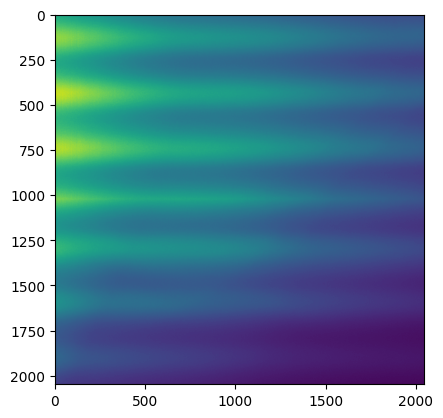

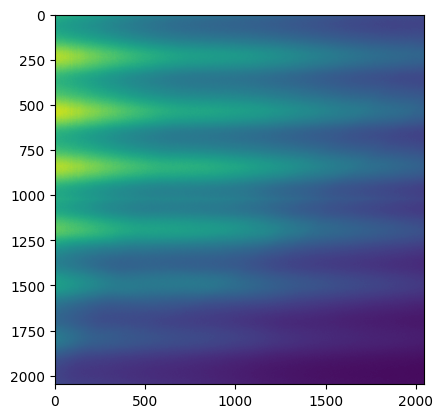

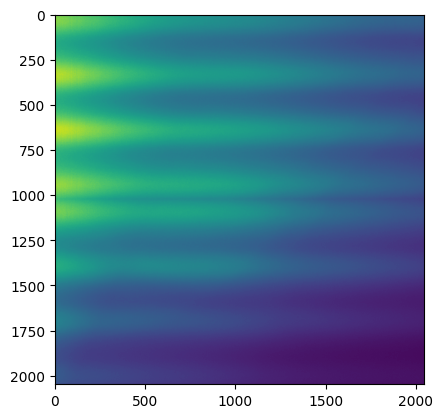

In [17]:
with dcam:
    camera = dcam[0]
    with camera:
        print(camera.info)
        print(camera['image_width'].value, camera['image_height'].value)

        # Simple acquisition example
        nb_frames = 3
        camera["exposure_time"] = 0.001
        with Stream(camera, nb_frames) as stream:
                logging.info("start acquisition")
                camera.start()
                for i, frame_buffer in enumerate(stream):
                    print(i)
                    frame = copy_frame(frame_buffer)
                    f = plt.figure()
                    plt.imshow(frame)
                    logging.info(f"acquired frame #%d/%d: %s", i+1, nb_frames, frame)
                logging.info("finished acquisition")